### Einführung

Willkommen zu diesem Jupyter-Notebook über Raytracing! Raytracing ist eine Technik in der Computergrafik, um dreidimensionale Szenen durch das Verfolgen von Strahlen (Rays) von einer Lichtquelle zu einem Objekt und dann zu einem Betrachter (Kamera) zu visualisieren. In dieser Einführung wird die Grundlage des Raytracings veranschaulicht, indem eine einfache Szene mit einer einzelnen Kugel (Sphere) gerendert wird.

Mit dem gegebenen Code haben wir einen einfachen Raytracer erstellt, der eine rote Kugel auf schwarzem Hintergrund rendert. Das Hauptprinzip hierbei ist die Ray-Sphere-Intersektion: Wenn ein Strahl die Kugel schneidet, wird der Pixel mit der Farbe der Kugel gefärbt; andernfalls bleibt er schwarz.

---

### Aufgaben

1. **Anpassungen**: Ändern Sie die Position, die Größe und die Farbe der Kugel im Code und beobachten Sie, wie sich das gerenderte Bild ändert.
  
2. **Mehrere Kugeln**: Erweitern Sie den Raytracer, um mehrere Kugeln zu rendern. Stellen Sie sicher, dass die Kugeln korrekt übereinander gerendert werden, basierend auf ihrer Position und Größe.

3. **Licht und Schatten**: Führen Sie eine einfache Lichtquelle in die Szene ein und implementieren Sie grundlegende Schattenwurf-Logik. Wenn ein Strahl von der Kamera zu einer Kugel und dann zur Lichtquelle geht und dabei eine andere Kugel schneidet, sollte der ursprüngliche Punkt im Schatten liegen.

4. **Reflexion**: Erweitern Sie den Raytracer, um einfache Reflexionen zu unterstützen. Wenn ein Strahl auf eine Kugel trifft, sollte er in einem bestimmten Winkel reflektiert werden, und der Raytracer sollte diesen reflektierten Strahl verfolgen, um zu bestimmen, welche Farbe an diesem Punkt gerendert werden soll.


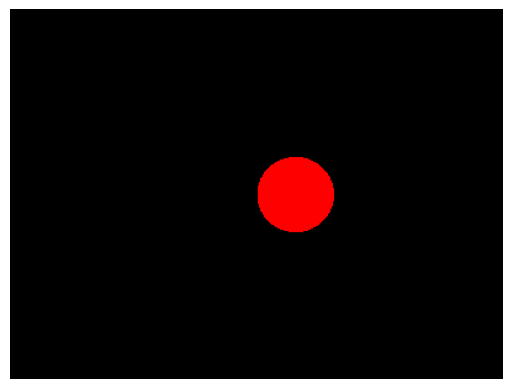

In [7]:
import micropip
await micropip.install("ipywidgets")
import math
import numpy as np
import matplotlib.pyplot as plt

class Vec3:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z

    def __add__(self, other):
        return Vec3(self.x + other.x, self.y + other.y, self.z + other.z)

    def __sub__(self, other):
        return Vec3(self.x - other.x, self.y - other.y, self.z - other.z)

    def dot(self, other):
        return self.x * other.x + self.y * other.y + self.z * other.z

    def magnitude(self):
        return math.sqrt(self.dot(self))

    def normalize(self):
        mag = self.magnitude()
        return Vec3(self.x / mag, self.y / mag, self.z / mag)

    def scale(self, scalar):
        return Vec3(self.x * scalar, self.y * scalar, self.z * scalar)

class Ray:
    def __init__(self, origin, direction):
        self.origin = origin
        self.direction = direction

class Sphere:
    def __init__(self, center, radius, color):
        self.center = center
        self.radius = radius
        self.color = color

    def hit(self, ray):
        oc = ray.origin - self.center
        a = ray.direction.dot(ray.direction)
        b = 2.0 * oc.dot(ray.direction)
        c = oc.dot(oc) - self.radius * self.radius
        discriminant = b*b - 4*a*c

        if discriminant > 0:
            t1 = (-b - math.sqrt(discriminant)) / (2.0 * a)
            t2 = (-b + math.sqrt(discriminant)) / (2.0 * a)
            if t1 > 0:
                return t1
            if t2 > 0:
                return t2
        return None

WIDTH, HEIGHT = 400, 300

def main():
    sphere = Sphere(Vec3(1, 0, -5), 1, (255, 0, 0))

    # Create an empty image as a numpy array
    image = np.zeros((HEIGHT, WIDTH, 3), dtype=np.uint8)
    aspect_ratio = WIDTH / HEIGHT
    for y in range(HEIGHT):
        for x in range(WIDTH):
            # Convert screen space to NDC (Normalized Device Coordinates)
            ndc_x = (x - WIDTH / 2) / (WIDTH / 2) * aspect_ratio
            ndc_y = -(y - HEIGHT / 2) / (HEIGHT / 2)

            ray = Ray(Vec3(0, 0, 0), Vec3(ndc_x, ndc_y, -1).normalize())
            t = sphere.hit(ray)
            if t is not None:
                image[y, x] = sphere.color

    plt.imshow(image)
    plt.axis('off')  # Turn off axis numbers and ticks
    plt.show()

# Call the main function directly to render and display the sphere
main()